<h3>Overall Citation Growth</h3>

In [1]:
pred_old_csv = "data/pred/dataset/csv/papers.csv"
pred_new_csv = "data/pred/dataset/csv/papers_collect_after_6months.csv"
norm_old_csv = "data/norm/dataset/csv/papers.csv"
norm_new_csv = "data/norm/dataset/csv/papers_collect_after_6months.csv"
auth_pred_csv = "data/pred/dataset/csv/paper_authors.csv"
auth_reg_csv  = "data/norm/dataset/csv/paper_authors.csv"

pred_old_pkl = "data/pred/dataset/pkl/papers.pkl"
pred_new_pkl = "data/pred/dataset/pkl/papers_collect_after_6months.pkl"
norm_old_pkl = "data/norm/dataset/pkl/papers.pkl"
norm_new_pkl = "data/norm/dataset/pkl/papers_collect_after_6months.pkl"
auth_pred_pkl = "data/pred/dataset/pkl/paper_authors.pkl"
auth_reg_pkl  = "data/norm/dataset/pkl/paper_authors.pkl"

In [2]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Change Path to test citation growth differences between baseline and after six month

# Baseline
pred_df = pd.read_pickle(pred_old_pkl)
norm_df = pd.read_pickle(norm_old_pkl)

# Six month later
# pred_df = pd.read_pickle(pred_new_pkl)
# norm_df = pd.read_pickle(norm_new_pkl)

for df in [pred_df, norm_df]:
    df['total_citations'] = pd.to_numeric(df['total_citations'], errors='coerce')
    df.dropna(subset=['total_citations'], inplace=True)
    df = df[df['total_citations'] >= 0]

cit_pred = pred_df['total_citations']
cit_norm = norm_df['total_citations']

mean_pred, std_pred = cit_pred.mean(), cit_pred.std()
mean_norm, std_norm = cit_norm.mean(), cit_norm.std()

print(f"Predatory: Mean = {mean_pred:.2f}, SD = {std_pred:.2f}, N = {len(cit_pred)}")
print(f"Normal:    Mean = {mean_norm:.2f}, SD = {std_norm:.2f}, N = {len(cit_norm)}")

# === t test ===
t_stat, p_value = ttest_ind(cit_pred, cit_norm, equal_var=False)

# === Cohen's d===
pooled_std = np.sqrt((std_pred ** 2 + std_norm ** 2) / 2)
cohen_d = (mean_pred - mean_norm) / pooled_std

print(f"\nStudent’s t-Test:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_value:.5f}")
print(f"\nCohen’s d   = {cohen_d:.3f}")


Predatory: Mean = 8.03, SD = 48.97, N = 7728
Normal:    Mean = 12.36, SD = 73.99, N = 8299

Student’s t-Test:
t-statistic = -4.395
p-value     = 0.00001

Cohen’s d   = -0.069


In [3]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Change Path to test citation growth differences between baseline and after six month

# Baseline
# pred_df = pd.read_pickle(pred_old_pkl)
# norm_df = pd.read_pickle(norm_old_pkl)

# Six month later
pred_df = pd.read_pickle(pred_new_pkl)
norm_df = pd.read_pickle(norm_new_pkl)

for df in [pred_df, norm_df]:
    df['total_citations'] = pd.to_numeric(df['total_citations'], errors='coerce')
    df.dropna(subset=['total_citations'], inplace=True)
    df = df[df['total_citations'] >= 0]

cit_pred = pred_df['total_citations']
cit_norm = norm_df['total_citations']

mean_pred, std_pred = cit_pred.mean(), cit_pred.std()
mean_norm, std_norm = cit_norm.mean(), cit_norm.std()

print(f"Predatory: Mean = {mean_pred:.2f}, SD = {std_pred:.2f}, N = {len(cit_pred)}")
print(f"Normal:    Mean = {mean_norm:.2f}, SD = {std_norm:.2f}, N = {len(cit_norm)}")

# === t test ===
t_stat, p_value = ttest_ind(cit_pred, cit_norm, equal_var=False)

# === Cohen's d===
pooled_std = np.sqrt((std_pred ** 2 + std_norm ** 2) / 2)
cohen_d = (mean_pred - mean_norm) / pooled_std

print(f"\nStudent’s t-Test:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_value:.5f}")
print(f"\nCohen’s d   = {cohen_d:.3f}")


Predatory: Mean = 20.22, SD = 63.10, N = 7727
Normal:    Mean = 20.27, SD = 124.41, N = 8298

Student’s t-Test:
t-statistic = -0.035
p-value     = 0.97222

Cohen’s d   = -0.001


Citation Change, conditioned on topic

In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np


# Change Path to test citation growth differences between baseline and after six month

# Baseline
pred_df = pd.read_pickle(pred_old_pkl)
norm_df = pd.read_pickle(norm_old_pkl)

# Six month later
# pred_df = pd.read_pickle(pred_new_pkl)
# norm_df = pd.read_pickle(norm_new_pkl)

for df in [pred_df, norm_df]:
    df['total_citations'] = pd.to_numeric(df['total_citations'], errors='coerce')
    df.dropna(subset=['total_citations', 'topic_title_abs_30'], inplace=True)
    df = df[df['total_citations'] >= 0]


all_topics = sorted(set(pred_df['topic_title_abs_30'].unique()) | set(norm_df['topic_title_abs_30'].unique()))

more_normal = 0
more_pred = 0
equal = 0
counted_topics = 0

for topic in all_topics:
    pred_topic = pred_df[pred_df['topic_title_abs_30'] == topic]['total_citations']
    norm_topic = norm_df[norm_df['topic_title_abs_30'] == topic]['total_citations']

    if len(pred_topic) < 5 or len(norm_topic) < 5:
        continue

    mean_pred = pred_topic.mean()
    mean_norm = norm_topic.mean()

    if mean_pred > mean_norm:
        more_pred += 1
    elif mean_norm > mean_pred:
        more_normal += 1
    else:
        equal += 1

    counted_topics += 1

    print(f"\n=== Topic: {topic} ===")
    print(f"Predatory Mean = {mean_pred:.2f}, Normal Mean = {mean_norm:.2f}")

print("\n=== Summary ===")
print(f"Topics compared: {counted_topics}")
print(f"Normal higher in {more_normal} topics ({more_normal / counted_topics:.2%})")
print(f"Predatory higher in {more_pred} topics ({more_pred / counted_topics:.2%})")
print(f"Equal in {equal} topics")



=== Topic: -1.0 ===
Predatory Mean = 4.55, Normal Mean = 13.68

=== Topic: 0.0 ===
Predatory Mean = 7.60, Normal Mean = 23.87

=== Topic: 1.0 ===
Predatory Mean = 7.95, Normal Mean = 9.71

=== Topic: 2.0 ===
Predatory Mean = 10.17, Normal Mean = 5.12

=== Topic: 3.0 ===
Predatory Mean = 7.96, Normal Mean = 12.52

=== Topic: 4.0 ===
Predatory Mean = 7.76, Normal Mean = 9.71

=== Topic: 5.0 ===
Predatory Mean = 2.98, Normal Mean = 10.44

=== Topic: 6.0 ===
Predatory Mean = 2.18, Normal Mean = 17.32

=== Topic: 7.0 ===
Predatory Mean = 6.93, Normal Mean = 7.33

=== Topic: 8.0 ===
Predatory Mean = 4.38, Normal Mean = 7.16

=== Topic: 9.0 ===
Predatory Mean = 6.26, Normal Mean = 12.22

=== Topic: 10.0 ===
Predatory Mean = 6.66, Normal Mean = 10.28

=== Topic: 11.0 ===
Predatory Mean = 4.22, Normal Mean = 11.52

=== Topic: 12.0 ===
Predatory Mean = 9.46, Normal Mean = 6.81

=== Topic: 13.0 ===
Predatory Mean = 6.55, Normal Mean = 7.42

=== Topic: 14.0 ===
Predatory Mean = 9.49, Normal Mean 

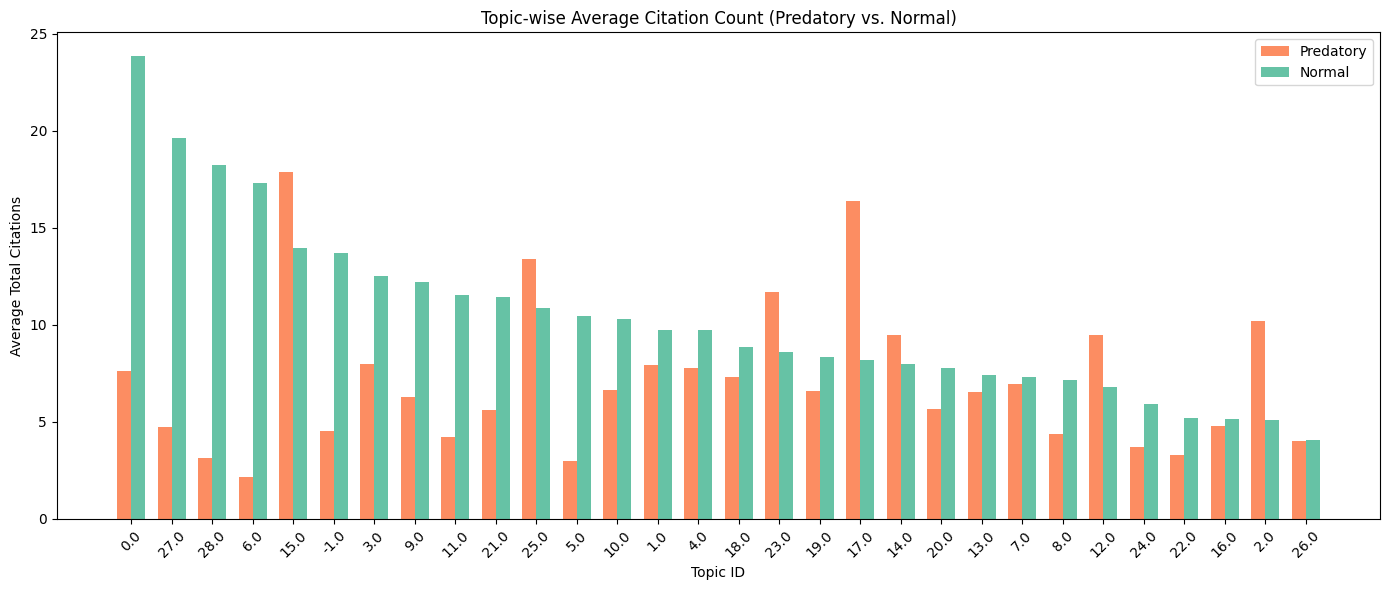

In [5]:

import matplotlib.pyplot as plt

topic_ids = []
pred_means = []
norm_means = []

for topic in all_topics:
    pred_topic = pred_df[pred_df['topic_title_abs_30'] == topic]['total_citations']
    norm_topic = norm_df[norm_df['topic_title_abs_30'] == topic]['total_citations']

    if len(pred_topic) < 5 or len(norm_topic) < 5:
        continue

    topic_ids.append(str(topic))
    pred_means.append(pred_topic.mean())
    norm_means.append(norm_topic.mean())

sorted_indices = np.argsort(norm_means)[::-1]
topic_ids = [topic_ids[i] for i in sorted_indices]
pred_means = [pred_means[i] for i in sorted_indices]
norm_means = [norm_means[i] for i in sorted_indices]

x = np.arange(len(topic_ids))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, pred_means, width, label='Predatory', color='#fc8d62')
plt.bar(x + width/2, norm_means, width, label='Normal', color='#66c2a5')

plt.xticks(x, topic_ids, rotation=45)
plt.ylabel('Average Total Citations')
plt.xlabel('Topic ID')
plt.title('Topic-wise Average Citation Count (Predatory vs. Normal)')
plt.legend()
plt.tight_layout()
plt.savefig("topic_citation_bar_comparison.pdf", dpi=300)
plt.show()


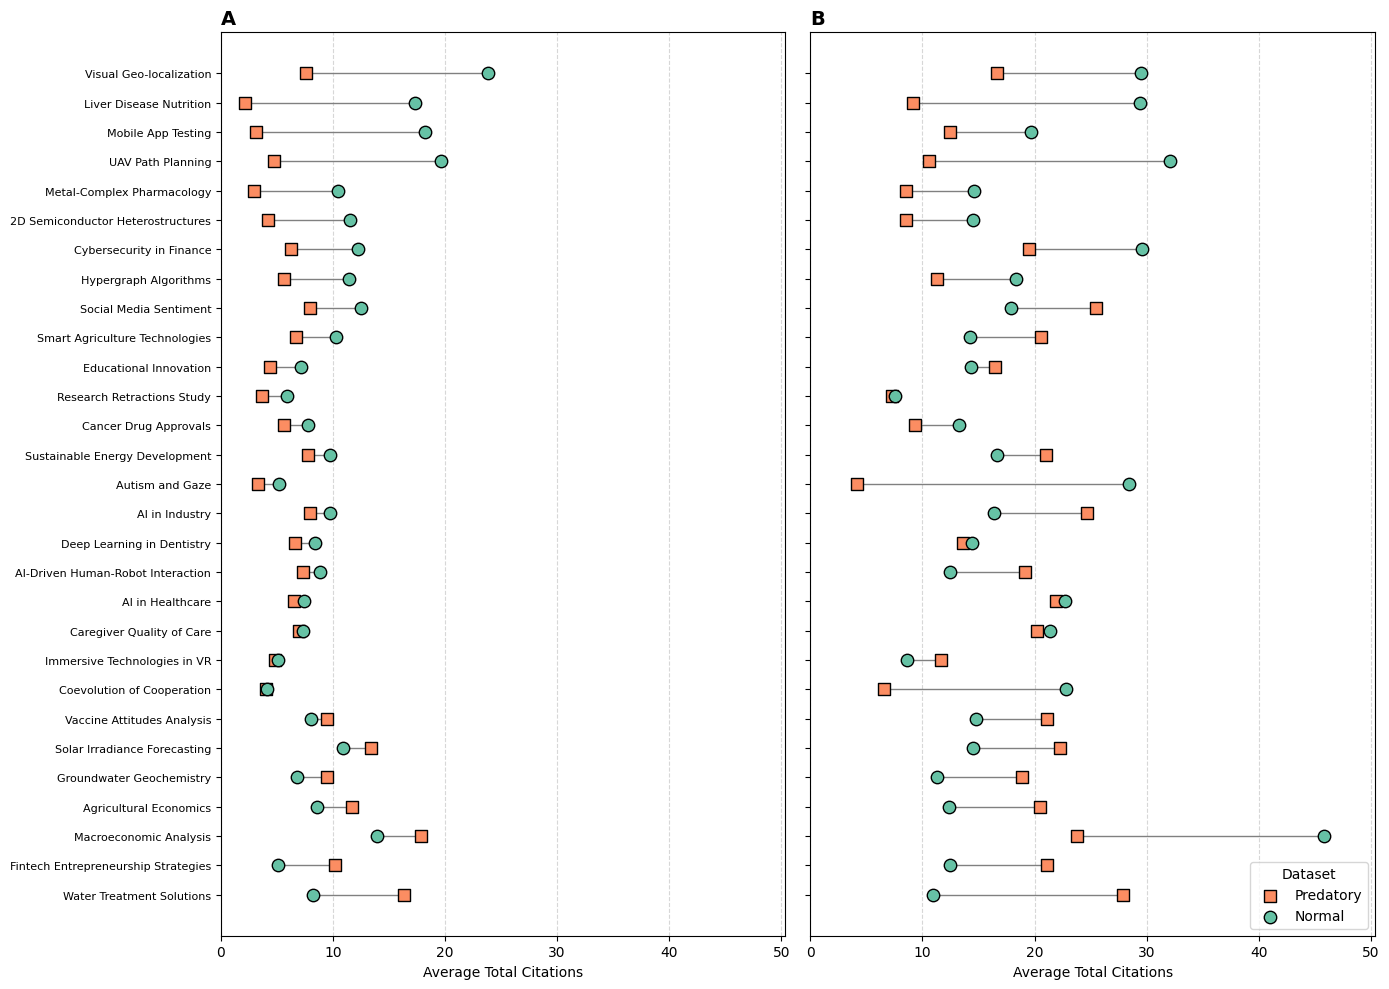


Previous:

=== Topic-Level Averages ===
Average of Predatory means across topics: 7.20
Average of Normal means across topics: 10.19

=== Paired t-test across topics ===
t = -2.621, p = 0.01402, Cohen’s d = -0.487

Normal leading in 22/29 topics.

After 6 Months:

=== Topic-Level Averages ===
Average of Predatory means across topics: 16.35
Average of Normal means across topics: 18.65

=== Paired t-test across topics ===
t = -1.130, p = 0.26787, Cohen’s d = -0.210

Normal leading in 16/29 topics.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

pred_old = pd.read_pickle(pred_old_pkl)
norm_old = pd.read_pickle(norm_old_pkl)
pred_new = pd.read_pickle(pred_new_pkl)
norm_new = pd.read_pickle(norm_new_pkl)

def compute_topic_means(pred_df, norm_df):
    for df in (pred_df, norm_df):
        df['total_citations'] = pd.to_numeric(df['total_citations'], errors='coerce')
        df.dropna(subset=['total_citations','topic_title_abs_30'], inplace=True)
        df = df[df['total_citations'] >= 0]
    topics, p_means, n_means = [], [], []
    for topic in range(29):
        p = pred_df[pred_df['topic_title_abs_30'] == float(topic)]['total_citations']
        n = norm_df[norm_df['topic_title_abs_30'] == float(topic)]['total_citations']
        if len(p) < 5 or len(n) < 5:
            continue
        topics.append(topic)
        p_means.append(p.mean())
        n_means.append(n.mean())
    return topics, p_means, n_means

topics_old, pred_old_means, norm_old_means = compute_topic_means(pred_old, norm_old)
topics_new, pred_new_means, norm_new_means = compute_topic_means(pred_new, norm_new)

df = pd.DataFrame({
    'topic': topics_old,
    'pred_old': pred_old_means,
    'norm_old': norm_old_means,
    'pred_new': pred_new_means,
    'norm_new': norm_new_means
})
df['diff_old'] = df['pred_old'] - df['norm_old']
df_sorted = df.sort_values('diff_old', ascending=False).reset_index(drop=True)

topic_names = {
    0: "Visual Geo-localization",
    1: "AI in Industry",
    2: "Fintech Entrepreneurship Strategies",
    3: "Social Media Sentiment",
    4: "Sustainable Energy Development",
    5: "Metal-Complex Pharmacology",
    6: "Liver Disease Nutrition",
    7: "Caregiver Quality of Care",
    8: "Educational Innovation",
    9: "Cybersecurity in Finance",
    10: "Smart Agriculture Technologies",
    11: "2D Semiconductor Heterostructures",
    12: "Groundwater Geochemistry",
    13: "AI in Healthcare",
    14: "Vaccine Attitudes Analysis",
    15: "Macroeconomic Analysis",
    16: "Immersive Technologies in VR",
    17: "Water Treatment Solutions",
    18: "AI-Driven Human-Robot Interaction",
    19: "Deep Learning in Dentistry",
    20: "Cancer Drug Approvals",
    21: "Hypergraph Algorithms",
    22: "Autism and Gaze",
    23: "Agricultural Economics",
    24: "Research Retractions Study",
    25: "Solar Irradiance Forecasting",
    26: "Coevolution of Cooperation",
    27: "UAV Path Planning",
    28: "Mobile App Testing"
}
ytick_labels = [ topic_names.get(t, str(t)) for t in df_sorted['topic'] ]

fig, axs = plt.subplots(1, 2, figsize=(14, 10), sharey=True)
x_max = df_sorted[['pred_old','norm_old','pred_new','norm_new']].max().max() * 1.1
y = np.arange(len(df_sorted))

for ax, suffix, title in zip(
    axs,
    ['old','new'],
    # ["A. Previous", "B. After 6 Months"]
     ["A", "B"]
):
    pm = df_sorted[f'pred_{suffix}']
    nm = df_sorted[f'norm_{suffix}']
    for i, (x1, x2) in enumerate(zip(pm, nm)):
        ax.plot([x1, x2], [i, i], color='gray', linewidth=1)
    ax.scatter(pm, y, marker='s', s=80,
               facecolor='#fc8d62', edgecolor='black', label='Predatory', zorder=3)
    ax.scatter(nm, y, marker='o', s=80,
               facecolor='#66c2a5', edgecolor='black', label='Normal',   zorder=3)
    ax.set_yticks(y)
    ax.set_yticklabels(ytick_labels, fontsize=8)
    ax.invert_yaxis()
    ax.set_xlim(0, x_max)
    ax.set_xlabel('Average Total Citations')
    ax.set_title(title, loc='left', fontsize=14, fontweight='bold')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

axs[1].legend(loc='lower right', title='Dataset')
plt.tight_layout()

plt.savefig("supple_cit_growth_topic.png",dpi=300)
plt.show()

# output statistical results
def report_stats(label, pred_means, norm_means):
    pred_means = np.array(pred_means)
    norm_means = np.array(norm_means)
    mean_pred = pred_means.mean()
    mean_norm = norm_means.mean()
    t_stat, p_val = stats.ttest_rel(pred_means, norm_means)
    cohen_d = (pred_means - norm_means).mean() / (np.std(pred_means - norm_means, ddof=1))
    leading = (norm_means > pred_means).sum() 
    total = len(pred_means)
    print(f"\n{label}:\n")
    print("=== Topic-Level Averages ===")
    print(f"Average of Predatory means across topics: {mean_pred:.2f}")
    print(f"Average of Normal means across topics: {mean_norm:.2f}")
    print("\n=== Paired t-test across topics ===")
    print(f"t = {t_stat:.3f}, p = {p_val:.5f}, Cohen’s d = {cohen_d:.3f}")
    print(f"\nNormal leading in {leading}/{total} topics.")

report_stats("Previous", df_sorted['pred_old'], df_sorted['norm_old'])
report_stats("After 6 Months", df_sorted['pred_new'], df_sorted['norm_new'])


Citation change, conditioned on authors

In [11]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

df_pred = pd.read_pickle(pred_old_pkl)
df_reg  = pd.read_pickle(norm_old_pkl)

auth_pred = pd.read_csv(auth_pred_csv)
auth_reg  = pd.read_csv(auth_reg_csv)

df_pred = df_pred[df_pred['total_citations'].notna()]
df_reg  = df_reg [df_reg ['total_citations'].notna()]

auth_pred = auth_pred[auth_pred['paper_id'].isin(df_pred['id'])]
auth_reg  = auth_reg [auth_reg ['paper_id'].isin(df_reg ['id'])]

pred_merge = auth_pred.merge(df_pred[['id','total_citations']],
                             left_on='paper_id', right_on='id')
reg_merge  = auth_reg .merge(df_reg [['id','total_citations']],
                             left_on='paper_id', right_on='id')

pred_cit = pred_merge.groupby('author_id')['total_citations'].mean().values
reg_cit  = reg_merge .groupby('author_id')['total_citations'].mean().values

# === Welch’s t-test ===
t_stat, p_val = ttest_ind(pred_cit, reg_cit, equal_var=False)

# === Cohen’s d ===
mean_diff = pred_cit.mean() - reg_cit.mean()
sd_pooled = np.sqrt((pred_cit.std()**2 + reg_cit.std()**2) / 2)
cohens_d  = mean_diff / sd_pooled

print(f"Pred authors: N={len(pred_cit)}, mean={pred_cit.mean():.2f}, SD={pred_cit.std():.2f}")
print(f"Norm authors: N={len(reg_cit)}, mean={reg_cit.mean():.2f}, SD={reg_cit.std():.2f}")
print(f"\nWelch’s t-test: t = {t_stat:.3f}, p = {p_val:.5f}")
print(f"Cohen’s d = {cohens_d:.3f}")


Pred authors: N=13210, mean=5.87, SD=37.47
Norm authors: N=19441, mean=12.07, SD=55.27

Welch’s t-test: t = -12.092, p = 0.00000
Cohen’s d = -0.131


In [26]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

df_pred = pd.read_pickle(pred_new_pkl)
df_reg  = pd.read_pickle(norm_new_pkl)

auth_pred = pd.read_csv(auth_pred_csv)
auth_reg  = pd.read_csv(auth_reg_csv)

df_pred = df_pred[df_pred['total_citations'].notna()]
df_reg  = df_reg [df_reg ['total_citations'].notna()]

auth_pred = auth_pred[auth_pred['paper_id'].isin(df_pred['id'])]
auth_reg  = auth_reg [auth_reg ['paper_id'].isin(df_reg ['id'])]

pred_merge = auth_pred.merge(df_pred[['id','total_citations']],
                             left_on='paper_id', right_on='id')
reg_merge  = auth_reg .merge(df_reg [['id','total_citations']],
                             left_on='paper_id', right_on='id')

pred_cit = pred_merge.groupby('author_id')['total_citations'].mean().values
reg_cit  = reg_merge .groupby('author_id')['total_citations'].mean().values

# === Welch’s t-test ===
t_stat, p_val = ttest_ind(pred_cit, reg_cit, equal_var=False)

# === Cohen’s d ===
mean_diff = pred_cit.mean() - reg_cit.mean()
sd_pooled = np.sqrt((pred_cit.std()**2 + reg_cit.std()**2) / 2)
cohens_d  = mean_diff / sd_pooled

print(f"Pred authors: N={len(pred_cit)}, mean={pred_cit.mean():.2f}, SD={pred_cit.std():.2f}")
print(f"Norm authors: N={len(reg_cit)}, mean={reg_cit.mean():.2f}, SD={reg_cit.std():.2f}")
print(f"\nWelch’s t-test: t = {t_stat:.3f}, p = {p_val:.5f}")
print(f"Cohen’s d = {cohens_d:.3f}")


Pred authors: N=11477, mean=18.96, SD=39.28
Norm authors: N=18117, mean=20.09, SD=126.97

Welch’s t-test: t = -1.117, p = 0.26422
Cohen’s d = -0.012


Compare citation count growth rate

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

pred_old = pd.read_csv(pred_old_csv)
pred_new = pd.read_csv(pred_new_csv)
norm_old = pd.read_csv(norm_old_csv)
norm_new = pd.read_csv(norm_new_csv)

pred_old = pred_old[['id','total_citations']].rename(columns={'id':'old_id','total_citations':'old_cit'})
pred_new = pred_new[['old_id','total_citations']].rename(columns={'total_citations':'new_cit'})
norm_old = norm_old[['id','total_citations']].rename(columns={'id':'old_id','total_citations':'old_cit'})
norm_new = norm_new[['old_id','total_citations']].rename(columns={'total_citations':'new_cit'})

for df in [pred_old, pred_new, norm_old, norm_new]:
    df['old_id'] = df['old_id'].astype(str)

m_pred = pd.merge(pred_new, pred_old, on='old_id', how='inner')
m_norm = pd.merge(norm_new, norm_old, on='old_id', how='inner')

def calc_growth(df):
    df = df.copy()
    df['growth_rate'] = (df['new_cit'] - df['old_cit']) / (df['old_cit']+1) * 100
    
    return df['growth_rate'].dropna()

gr_pred = calc_growth(m_pred)
gr_norm = calc_growth(m_norm)

# === 5. statistical results & tests ===
print(f"Predatory: N={len(gr_pred)}, mean growth={gr_pred.mean():.2f}%")
print(f"Normal   : N={len(gr_norm)},  mean growth={gr_norm.mean():.2f}%")

t_stat, p_val = ttest_ind(gr_pred, gr_norm, equal_var=False)
print(f"\nWelch’s t-test: t = {t_stat:.3f}, p = {p_val:.5f}")

Predatory: N=7727, mean growth=432.15%
Normal   : N=8298,  mean growth=420.65%

Welch’s t-test: t = 0.115, p = 0.90841


Pred median = 200.00%, IQR = 100.00%–500.00%
Norm  median = 50.00%, IQR = 21.05%–100.00%
Mann–Whitney U = 20437821.50, p = 0.00000


/tmp/ipykernel_505164/2654235516.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


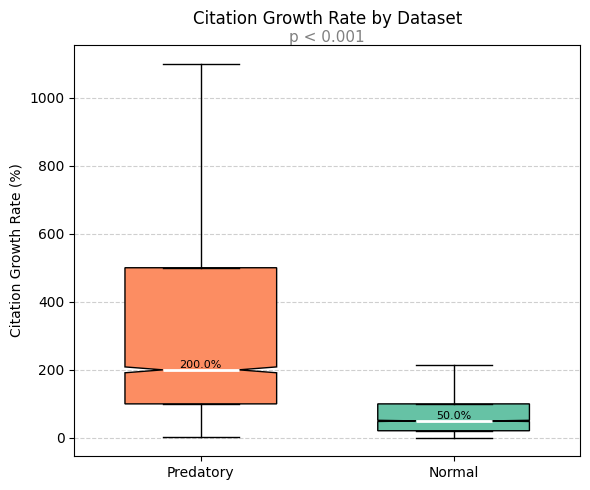

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

gp = gr_pred[gr_pred > 0]
gn = gr_norm[gr_norm > 0]

u_stat, p_val = mannwhitneyu(gp, gn, alternative='two-sided')

med_pred = np.median(gp)
med_norm = np.median(gn)
q25_pred, q75_pred = np.percentile(gp, [25, 75])
q25_norm, q75_norm = np.percentile(gn, [25, 75])

print(f"Pred median = {med_pred:.2f}%, IQR = {q25_pred:.2f}%–{q75_pred:.2f}%")
print(f"Norm  median = {med_norm:.2f}%, IQR = {q25_norm:.2f}%–{q75_norm:.2f}%")
print(f"Mann–Whitney U = {u_stat:.2f}, p = {p_val:.5f}")

p_text = "p < 0.001" if p_val < 0.001 else f"p = {p_val:.3f}"

fig, ax = plt.subplots(figsize=(6, 5))
data = [gp.values, gn.values]
labels = ['Predatory', 'Normal']
colors = ['#fc8d62', '#66c2a5']

bp = ax.boxplot(
    data,
    labels=labels,
    notch=True,
    patch_artist=True,
    showfliers=False,
    widths=0.6,
    boxprops={'edgecolor':'black'},
    whiskerprops={'color':'black'},
    capprops={'color':'black'},
    medianprops={'color':'white','linewidth':2}
)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for i, med in enumerate([med_pred, med_norm], start=1):
    ax.text(i, med, f"{med:.1f}%", ha='center', va='bottom',
            color='black', fontsize=8)

for i, (q25, q75) in enumerate([(q25_pred, q75_pred), (q25_norm, q75_norm)], start=1):
    ax.plot([i-0.15, i+0.15], [q25, q25], color='black', linewidth=1)
    ax.plot([i-0.15, i+0.15], [q75, q75], color='black', linewidth=1)

ax.text(0.5, 1, p_text, transform=ax.transAxes,
        ha='center', va='bottom', fontsize=11, color='gray')

ax.set_ylabel('Citation Growth Rate (%)')
ax.set_title('Citation Growth Rate by Dataset', pad=15)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


Citation growth rate conditioned by topic

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

pred_old = pd.read_csv(pred_old_csv, usecols=['id','total_citations','topic_title_abs_30'])
pred_new = pd.read_csv(pred_new_csv, usecols=['old_id','total_citations','topic_title_abs_30'])
norm_old = pd.read_csv(norm_old_csv, usecols=['id','total_citations','topic_title_abs_30'])
norm_new = pd.read_csv(norm_new_csv, usecols=['old_id','total_citations','topic_title_abs_30'])

pred_old = pred_old.rename(columns={
    'id':'old_id',
    'total_citations':'old_cit',
    'topic_title_abs_30':'topic_raw'
})
pred_new = pred_new.rename(columns={
    'total_citations':'new_cit',
    'topic_title_abs_30':'topic_raw'
})
norm_old = norm_old.rename(columns={
    'id':'old_id',
    'total_citations':'old_cit',
    'topic_title_abs_30':'topic_raw'
})
norm_new = norm_new.rename(columns={
    'total_citations':'new_cit',
    'topic_title_abs_30':'topic_raw'
})


for df in (pred_old, pred_new, norm_old, norm_new):
    df['old_id'] = df['old_id'].astype(str)
    df['topic'] = pd.to_numeric(df['topic_raw'], errors='coerce')  # 转成数字
    df.dropna(subset=['topic'], inplace=True)                     # 丢弃 NaN
    df['topic'] = df['topic'].astype(int)

m_pred = pd.merge(
    pred_new[['old_id','topic','new_cit']],
    pred_old[['old_id','topic','old_cit']],
    on=['old_id','topic'],
    how='inner'
)
m_norm = pd.merge(
    norm_new[['old_id','topic','new_cit']],
    norm_old[['old_id','topic','old_cit']],
    on=['old_id','topic'],
    how='inner'
)

def calc_growth(df):
    df = df.copy()
    df['growth_rate'] = (df['new_cit'] - df['old_cit']) / (df['old_cit'] + 1) * 100
    return df[['topic','growth_rate']]

gr_pred = calc_growth(m_pred)
gr_norm = calc_growth(m_norm)

gr_pred['dataset'] = 'Predatory'
gr_norm['dataset'] = 'Normal'

gr_all = pd.concat([gr_pred, gr_norm], ignore_index=True)

results = []
for topic, grp in gr_all.groupby('topic'):
    gp = grp.loc[grp['dataset']=='Predatory', 'growth_rate']
    gn = grp.loc[grp['dataset']=='Normal',   'growth_rate']
    if len(gp) < 5 or len(gn) < 5:
        continue

    n_p, n_n = len(gp), len(gn)
    mean_p, mean_n = gp.mean(), gn.mean()
    # Welch’s t-test
    t_stat, p_val = ttest_ind(gp, gn, equal_var=False)
    # Cohen’s d
    pooled_sd = np.sqrt((gp.std(ddof=1)**2 + gn.std(ddof=1)**2) / 2)
    coh_d = (mean_p - mean_n) / pooled_sd if pooled_sd > 0 else np.nan

    results.append({
        'topic': topic,
        'n_pred': n_p, 'mean_pred': mean_p,
        'n_norm': n_n, 'mean_norm': mean_n,
        't_stat': t_stat, 'p_value': p_val,
        'cohens_d': coh_d
    })

result_df = pd.DataFrame(results).sort_values(by='topic')

print(result_df.to_string(index=False))

# optional
# result_df.to_csv("topic_growth_rate_comparison.csv", index=False)


 topic  n_pred  mean_pred  n_norm   mean_norm    t_stat      p_value  cohens_d
    -1      88 197.006184     109 1110.937684 -1.847920 6.732827e-02 -0.250411
     0     113 213.510050    1261   86.364701  3.287873 1.263454e-03  0.288939
     1    1299 544.214518     114  281.636251  1.396505 1.651173e-01  0.159011
     2    1109 380.209310      68  534.323461 -0.569819 5.705866e-01 -0.080023
     3     278 459.750087     667  104.126648  5.386746 1.456592e-07  0.445483
     4     867 526.109621     169  468.129597  0.159977 8.730851e-01  0.016858
     5      93 242.833638     707   98.108771  3.371559 9.457130e-04  0.311352
     6      45 412.001610     614  742.672495 -1.010385 3.129414e-01 -0.066825
     7     122 306.114881     568 1211.024978 -0.806293 4.204084e-01 -0.047954
     8     613 460.431565     114  364.277025  0.301738 7.632137e-01  0.029303
     9     559 498.591212     149 1390.114342       NaN          NaN -0.086242
    10      68 440.975989     454   60.020025  3.148

Topics compared: 29
Pred > Norm in 24 topics (82.76%)
Wilcoxon signed-rank: stat = 7.00, p = 0.00001
Paired t-test: t = 7.73, p = 0.00000
Cohen's d = 1.44


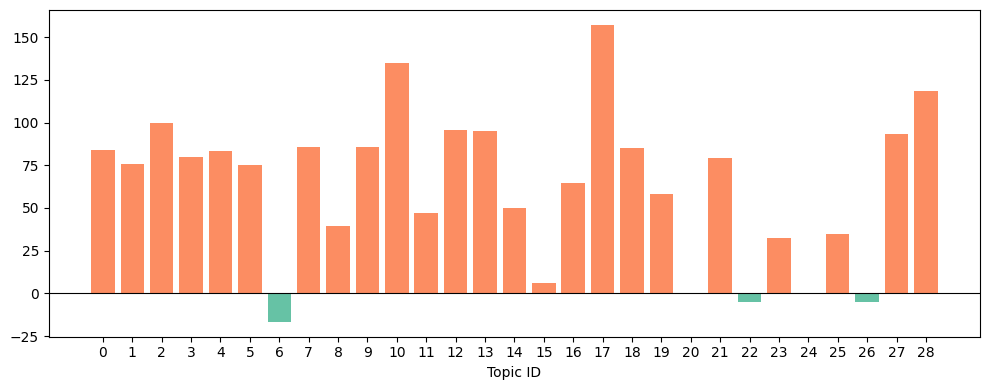

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon, ttest_rel
import matplotlib.pyplot as plt

pred_old = pd.read_csv(pred_old_csv, usecols=['id','total_citations','topic_title_abs_30'])
pred_new = pd.read_csv(pred_new_csv, usecols=['old_id','total_citations','topic_title_abs_30'])
norm_old = pd.read_csv(norm_old_csv, usecols=['id','total_citations','topic_title_abs_30'])
norm_new = pd.read_csv(norm_new_csv, usecols=['old_id','total_citations','topic_title_abs_30'])

for df, id_col in [(pred_old,'id'),(pred_new,'old_id'),(norm_old,'id'),(norm_new,'old_id')]:
    df.rename(columns={
        id_col: 'old_id',
        'total_citations': 'cit',
        'topic_title_abs_30': 'topic_raw'
    }, inplace=True)
    df['old_id'] = df['old_id'].astype(str)
    df['topic'] = pd.to_numeric(df['topic_raw'], errors='coerce')
    df.dropna(subset=['topic'], inplace=True)
    df['topic'] = df['topic'].astype(int)

pred = pd.merge(
    pred_new[['old_id','topic','cit']],
    pred_old[['old_id','topic','cit']],
    on=['old_id','topic'], how='inner',
    suffixes=('_new','_old')
)
norm = pd.merge(
    norm_new[['old_id','topic','cit']],
    norm_old[['old_id','topic','cit']],
    on=['old_id','topic'], how='inner',
    suffixes=('_new','_old')
)

pred['growth_rate'] = (pred['cit_new'] - pred['cit_old']) / (pred['cit_old'] + 1) * 100
norm['growth_rate'] = (norm['cit_new'] - norm['cit_old']) / (norm['cit_old'] + 1) * 100

medians = []
topics = sorted(set(pred['topic']) & set(norm['topic']))
for topic in topics:
    if topic == -1:
        continue
    gp = pred.loc[pred['topic']==topic, 'growth_rate']
    gn = norm.loc[norm['topic']==topic, 'growth_rate']
    if len(gp) >= 5 and len(gn) >= 5:
        medians.append({
            'topic': topic,
            'median_pred': gp.median(),
            'median_norm': gn.median()
        })
med_df = pd.DataFrame(medians).sort_values('topic')

diff = med_df['median_pred'] - med_df['median_norm']
n_topics = len(med_df)
pos = (diff > 0).sum()
percent_pos = pos / n_topics

stat_w, p_w = wilcoxon(med_df['median_pred'], med_df['median_norm'])
t_stat, p_t = ttest_rel(med_df['median_pred'], med_df['median_norm'])
mean_diff = diff.mean()
sd_diff = diff.std(ddof=1)
coh_d = mean_diff / sd_diff if sd_diff > 0 else np.nan

print(f"Topics compared: {n_topics}")
print(f"Pred > Norm in {pos} topics ({percent_pos:.2%})")
print(f"Wilcoxon signed-rank: stat = {stat_w:.2f}, p = {p_w:.5f}")
print(f"Paired t-test: t = {t_stat:.2f}, p = {p_t:.5f}")
print(f"Cohen's d = {coh_d:.2f}")

colors = diff.apply(lambda x: '#fc8d62' if x > 0 else '#66c2a5')
plt.figure(figsize=(10,4))
plt.bar(med_df['topic'], diff, color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(med_df['topic'])
plt.xlabel('Topic ID')

plt.tight_layout()
plt.show()


Citation growth conditioned on author

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind

def load_growth(old_csv, new_csv):
    old = pd.read_csv(old_csv, usecols=['id','total_citations'])\
            .rename(columns={'id':'old_id','total_citations':'old_cit'})
    new = pd.read_csv(new_csv, usecols=['old_id','total_citations'])\
            .rename(columns={'total_citations':'new_cit'})
    old['old_id'] = old['old_id'].astype(str)
    new['old_id'] = new['old_id'].astype(str)
    m = new.merge(old, on='old_id', how='inner')
    m['growth_rate'] = (m['new_cit'] - m['old_cit']) / (m['old_cit'] + 1) * 100
    return m[['old_id','growth_rate']]

pred_growth = load_growth(pred_old_csv, pred_new_csv)
norm_growth = load_growth(norm_old_csv, norm_new_csv)

auth_pred = pd.read_csv(auth_pred_csv, usecols=['paper_id','author_id'])
auth_reg  = pd.read_csv(auth_reg_csv,  usecols=['paper_id','author_id'])

auth_pred['paper_id'] = auth_pred['paper_id'].astype(str)
auth_reg ['paper_id'] = auth_reg ['paper_id'].astype(str)
pred_growth['old_id'] = pred_growth['old_id'].astype(str)
norm_growth['old_id'] = norm_growth['old_id'].astype(str)

ap = auth_pred.merge(pred_growth, left_on='paper_id', right_on='old_id', how='inner')
pred_author_growth = ap.groupby('author_id')['growth_rate'].mean()

ar = auth_reg.merge(norm_growth, left_on='paper_id', right_on='old_id', how='inner')
norm_author_growth = ar.groupby('author_id')['growth_rate'].mean()

med_pred = pred_author_growth.median()
med_norm = norm_author_growth.median()
iqr_pred = pred_author_growth.quantile(0.75) - pred_author_growth.quantile(0.25)
iqr_norm = norm_author_growth.quantile(0.75) - norm_author_growth.quantile(0.25)

# mannwhitneyu 
u_stat, p_u = mannwhitneyu(pred_author_growth, norm_author_growth, alternative='two-sided')
t_stat, p_t = ttest_ind(pred_author_growth, norm_author_growth, equal_var=False)
# Cohen’s d
diff_mean = pred_author_growth.mean() - norm_author_growth.mean()
sd_pooled = np.sqrt((pred_author_growth.std(ddof=1)**2 + norm_author_growth.std(ddof=1)**2) / 2)
coh_d = diff_mean / sd_pooled

print(f"Predatory authors: n = {len(pred_author_growth)}, median = {med_pred:.2f}%, IQR = {iqr_pred:.2f}%")
print(f"Normal   authors: n = {len(norm_author_growth)}, median = {med_norm:.2f}%, IQR = {iqr_norm:.2f}%\n")

print(f"Mann–Whitney U = {u_stat:.2f}, p = {p_u:.5f}")
print(f"Welch’s t-test: t = {t_stat:.2f}, p = {p_t:.5f}")
print(f"Cohen’s d = {coh_d:.2f}")


Predatory authors: n = 13210, median = 100.00%, IQR = 394.74%
Normal   authors: n = 19434, median = 25.00%, IQR = 80.00%

Mann–Whitney U = nan, p = nan
Welch’s t-test: t = nan, p = nan
Cohen’s d = 0.03


Pred median = 115.28%, IQR = 12.50%–400.00%
Norm  median = 25.00%, IQR = 0.00%–80.00%
Mann–Whitney U = 174838251.00, p = 0.00000


/tmp/ipykernel_350720/2515631090.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


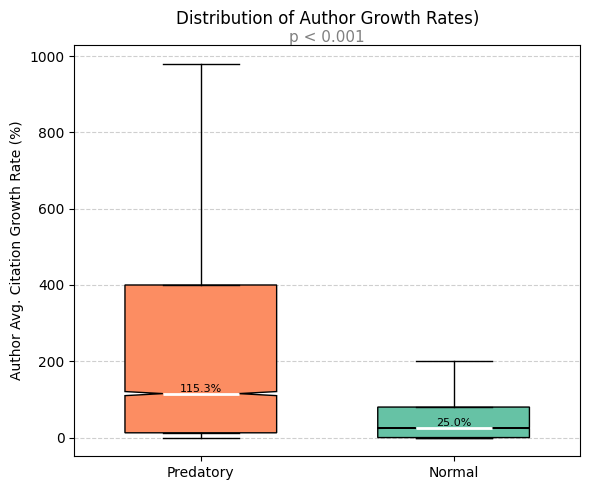

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

gp = pred_author_growth.dropna()
gn = norm_author_growth.dropna()

gp = gp[gp >= 0]
gn = gn[gn >= 0]

u_stat, p_val = mannwhitneyu(gp, gn, alternative='two-sided')
p_text = "p < 0.001" if p_val < 0.001 else f"p = {p_val:.3f}"

# === median & IQR ===
med_pred = np.median(gp)
med_norm = np.median(gn)
q25_pred, q75_pred = np.percentile(gp, [25, 75])
q25_norm, q75_norm = np.percentile(gn, [25, 75])

print(f"Pred median = {med_pred:.2f}%, IQR = {q25_pred:.2f}%–{q75_pred:.2f}%")
print(f"Norm  median = {med_norm:.2f}%, IQR = {q25_norm:.2f}%–{q75_norm:.2f}%")
print(f"Mann–Whitney U = {u_stat:.2f}, p = {p_val:.5f}")

fig, ax = plt.subplots(figsize=(6, 5))
data = [gp.values, gn.values]
labels = ['Predatory', 'Normal']
colors = ['#fc8d62', '#66c2a5']

bp = ax.boxplot(
    data,
    labels=labels,
    notch=True,
    patch_artist=True,
    showfliers=False,
    widths=0.6,
    boxprops={'edgecolor':'black'},
    whiskerprops={'color':'black'},
    capprops={'color':'black'},
    medianprops={'color':'white','linewidth':2}
)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for i, med in enumerate([med_pred, med_norm], start=1):
    ax.text(i, med, f"{med:.1f}%", ha='center', va='bottom', color='black', fontsize=8)

for i, (q25, q75) in enumerate([(q25_pred, q75_pred), (q25_norm, q75_norm)], start=1):
    ax.plot([i-0.15, i+0.15], [q25, q25], color='black', linewidth=1)
    ax.plot([i-0.15, i+0.15], [q75, q75], color='black', linewidth=1)

ax.text(0.5, 1, p_text, transform=ax.transAxes, ha='center', va='bottom', fontsize=11, color='gray')

ax.set_ylabel('Author Avg. Citation Growth Rate (%)')
ax.set_title('Distribution of Author Growth Rates)', pad=15)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


In [10]:
import numpy as np
from scipy.stats import mannwhitneyu

gp = pred_author_growth.dropna().values
gn = norm_author_growth.dropna().values
n1, n2 = len(gp), len(gn)

u_stat, p_val = mannwhitneyu(gp, gn, alternative='two-sided')
common_lang = u_stat / (n1 * n2)

print(f"Mann–Whitney U = {u_stat:.0f}, p = {p_val:.5f}")
print(f"Common-Language Effect P(pred > norm) = {common_lang:.3f}")

m = min(2000, n1, n2) 
idx1 = np.random.choice(n1, m, replace=False)
idx2 = np.random.choice(n2, m, replace=False)

diffs = gp[idx1][:, None] - gn[idx2][None, :]
hl_estimate = np.median(diffs)

print(f"Hodges–Lehmann location shift ≈ {hl_estimate:.2f}%")


Mann–Whitney U = 175504928, p = 0.00000
Common-Language Effect P(pred > norm) = 0.684
Hodges–Lehmann location shift ≈ 81.82%


<h2>Using data from Crossref - age-matched citation accrual over same windows </h2>

Clean crossref meta data

In [34]:
import pandas as pd

path = "/home/yuying/Documents/scholar/analysis/citation_growth/pred_with_meta.csv"
df = pd.read_csv(path, parse_dates=["publication_date"])

dups = df[df.duplicated(subset="id", keep=False)]
print("repeated ID:")
print(dups.sort_values("id"))

df_clean = df.drop_duplicates(subset="id", keep="first")

out_path = "/home/yuying/Documents/scholar/analysis/citation_growth/pred_with_meta_clean.csv"
df_clean.to_csv(out_path, index=False)


repeated ID:
         id                                              title  \
6386   2751  Assessing the role of carbon pricing in global...   
2377   2751  Assessing the role of carbon pricing in global...   
2378   2752  Towards Developing a National Climate Change F...   
6387   2752  Towards Developing a National Climate Change F...   
6388   2754  MINING COMPANIES AND CORPORATE SOCIAL RESPONSI...   
...     ...                                                ...   
10035  7248  Deep belief networks (DBN) for financial time ...   
6384   7250  Combine deep learning and artificial intellige...   
10036  7250  Combine deep learning and artificial intellige...   
10037  7252  Applications of Artificial Intelligence Genera...   
6385   7252  Applications of Artificial Intelligence Genera...   

                                                 authors publication_date  \
6386   Wags Numoipiri Digitemie; Ifeanyi Onyedika Eke...       2024-03-30   
2377   Wags Numoipiri Digitemie; Ifeanyi

Match Age

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as ss

datasets = {
    "Normal": {
        "t1":  "/home/yuying/Documents/scholar/DB_convert/7.8/good/norm_papers.csv",
        "t2":  "/home/yuying/Documents/scholar/DB_convert/7.8/good/newNorm_papers.csv",
        "meta":"/home/yuying/Documents/scholar/analysis/citation_growth/norm_with_meta.csv"
    },
    "Predatory": {
        "t1":  "/home/yuying/Documents/scholar/DB_convert/7.8/bad/pred_papers.csv",
        "t2":  "/home/yuying/Documents/scholar/DB_convert/7.8/bad/newPred_papers.csv",
        "meta":"/home/yuying/Documents/scholar/analysis/citation_growth/pred_with_meta_clean.csv"
    }
}

for label, paths in datasets.items():
    print(f"\n===== {label} =====")

    if label == "Predatory":
        t1 = pd.to_datetime("2024-10-21")
    else:  # Normal
        t1 = pd.to_datetime("2025-01-22")
    lower = t1 - pd.Timedelta(days=365*20)

    df1 = pd.read_csv(paths["t1"],  usecols=["id", "total_citations"])\
            .rename(columns={"total_citations": "C_t1"})
    df2 = pd.read_csv(paths["t2"],  usecols=["id", "total_citations"])\
            .rename(columns={"total_citations": "C_t2"})
    
    meta = pd.read_csv(paths["meta"], usecols=["id", "publication_date"])
    meta["publication_date"] = pd.to_datetime(
        meta["publication_date"], format="%Y-%m-%d", errors="coerce"
    ).dropna()
   
    lower = t1 - pd.Timedelta(days=365*20)
    meta = meta[(meta["publication_date"] <= t1) & (meta["publication_date"] >= lower)]
    
    df = (meta.merge(df1, on="id")
              .merge(df2, on="id"))
    df = df[df["C_t2"] >= df["C_t1"]]
    
    df["age_t1"]   = (t1 - df["publication_date"]).dt.days / 365
    df["delta_C"]  = df["C_t2"] - df["C_t1"]
    df["C_t1_adj"] = df["C_t1"].replace(0, 1)
    df["growth_rate"] = df["delta_C"] / df["C_t1_adj"] * 100
    df = df[df["growth_rate"] >= 0]
    
    bins   = [0, 0.5, 1, 2, 3, np.inf]
    labels = ["0–6m", "6m–1y", "1–2y", "2–3y", ">3y"]

    df["age_bin"] = pd.cut(df["age_t1"], bins=bins, labels=labels)

    
    summary = []
    for age_bin, sub in df.groupby("age_bin", observed=True):
        total = len(sub)
        n_zero = (sub["growth_rate"] == 0).sum()
        n_pos  = (sub["growth_rate"] > 0).sum()
        gr     = sub["growth_rate"]
        median = np.median(gr)
        iqr    = np.percentile(gr, [25, 75])
        summary.append({
            "age_bin":        age_bin,
            "total_papers":   total,
            "n_zero (%)":     f"{n_zero} ({n_zero/total:.1%})",
            "n_positive (%)": f"{n_pos} ({n_pos/total:.1%})",
            "median_growth%": f"{median:.1f}",
            "IQR_%":          f"{iqr[0]:.1f}–{iqr[1]:.1f}"
        })
    summary_df = pd.DataFrame(summary)
    
    print(summary_df.to_string(index=False))



===== Normal =====
age_bin  total_papers  n_zero (%) n_positive (%) median_growth%        IQR_%
   0–6m           891 190 (21.3%)    701 (78.7%)          300.0  95.8–1141.7
  6m–1y           570 106 (18.6%)    464 (81.4%)          300.0 100.0–1100.0
   1–2y           882 177 (20.1%)    705 (79.9%)          200.0   47.5–800.0
   2–3y           607 100 (16.5%)    507 (83.5%)          200.0   50.0–729.2
    >3y          1189 212 (17.8%)    977 (82.2%)          300.0  75.0–1200.0

===== Predatory =====
age_bin  total_papers  n_zero (%) n_positive (%) median_growth%        IQR_%
   0–6m          1676 300 (17.9%)   1376 (82.1%)          500.0 100.0–2200.0
  6m–1y          1076 151 (14.0%)    925 (86.0%)          400.0 100.0–1500.0
   1–2y           478  56 (11.7%)    422 (88.3%)          500.0 100.0–2000.0
   2–3y           345  59 (17.1%)    286 (82.9%)          466.7 100.0–1700.0
    >3y           818 175 (21.4%)    643 (78.6%)          411.5  53.3–1900.0


Statistical Tests

In [36]:
import numpy as np
import pandas as pd
import scipy.stats as ss


frames = []
for label, paths in datasets.items():
    if label == "Predatory":
        t1 = pd.to_datetime("2024-10-21") # the date finished predatory set collection
    else:  # Normal
        t1 = pd.to_datetime("2025-01-22") # date finished normal set collection
    lower = t1 - pd.Timedelta(days=365*20)
    
    df1 = pd.read_csv(paths["t1"],  usecols=["id", "total_citations"]).rename(columns={"total_citations":"C_t1"})
    df2 = pd.read_csv(paths["t2"],  usecols=["id", "total_citations"]).rename(columns={"total_citations":"C_t2"})

    meta = pd.read_csv(paths["meta"], usecols=["id","publication_date"])
    meta["publication_date"] = pd.to_datetime(meta["publication_date"], format="%Y-%m-%d", errors="coerce")
    meta = meta.dropna(subset=["publication_date"])
    meta = meta[(meta["publication_date"]<=t1)&(meta["publication_date"]>=lower)]
   
    df = meta.merge(df1, on="id").merge(df2, on="id")
    df = df[df["C_t2"]>=df["C_t1"]]

    df["age_t1"] = (t1 - df["publication_date"]).dt.days/365
    df["delta_C"] = df["C_t2"] - df["C_t1"]
    df["C_t1_adj"] = df["C_t1"].replace(0, 1)
    df["growth_rate"] = df["delta_C"]/df["C_t1_adj"]*100
    df = df[df["growth_rate"]>=0]
  
    df["age_bin"] = pd.cut(df["age_t1"], bins=bins, labels=labels)
    df["dataset"] = label
    frames.append(df)

df_all = pd.concat(frames, ignore_index=True)

# Mann–Whitney U 
print("Age bin  |   U statistic   |     p-value")
print("----------------------------------------")
for age_bin, sub in df_all.groupby("age_bin", observed=True):
    pred = sub.loc[sub["dataset"]=="Predatory", "growth_rate"]
    norm = sub.loc[sub["dataset"]=="Normal",    "growth_rate"]
    u_stat, pval = ss.mannwhitneyu(pred[pred>0], norm[norm>0], alternative="two-sided")
    print(f"{age_bin:>6}   | {u_stat:13.0f} | {pval: .3e}")


Age bin  |   U statistic   |     p-value
----------------------------------------
  0–6m   |        551532 |  8.198e-08
 6m–1y   |        218752 |  5.558e-01
  1–2y   |        175399 |  4.613e-07
  2–3y   |         91002 |  2.276e-09
   >3y   |        356369 |  4.393e-06


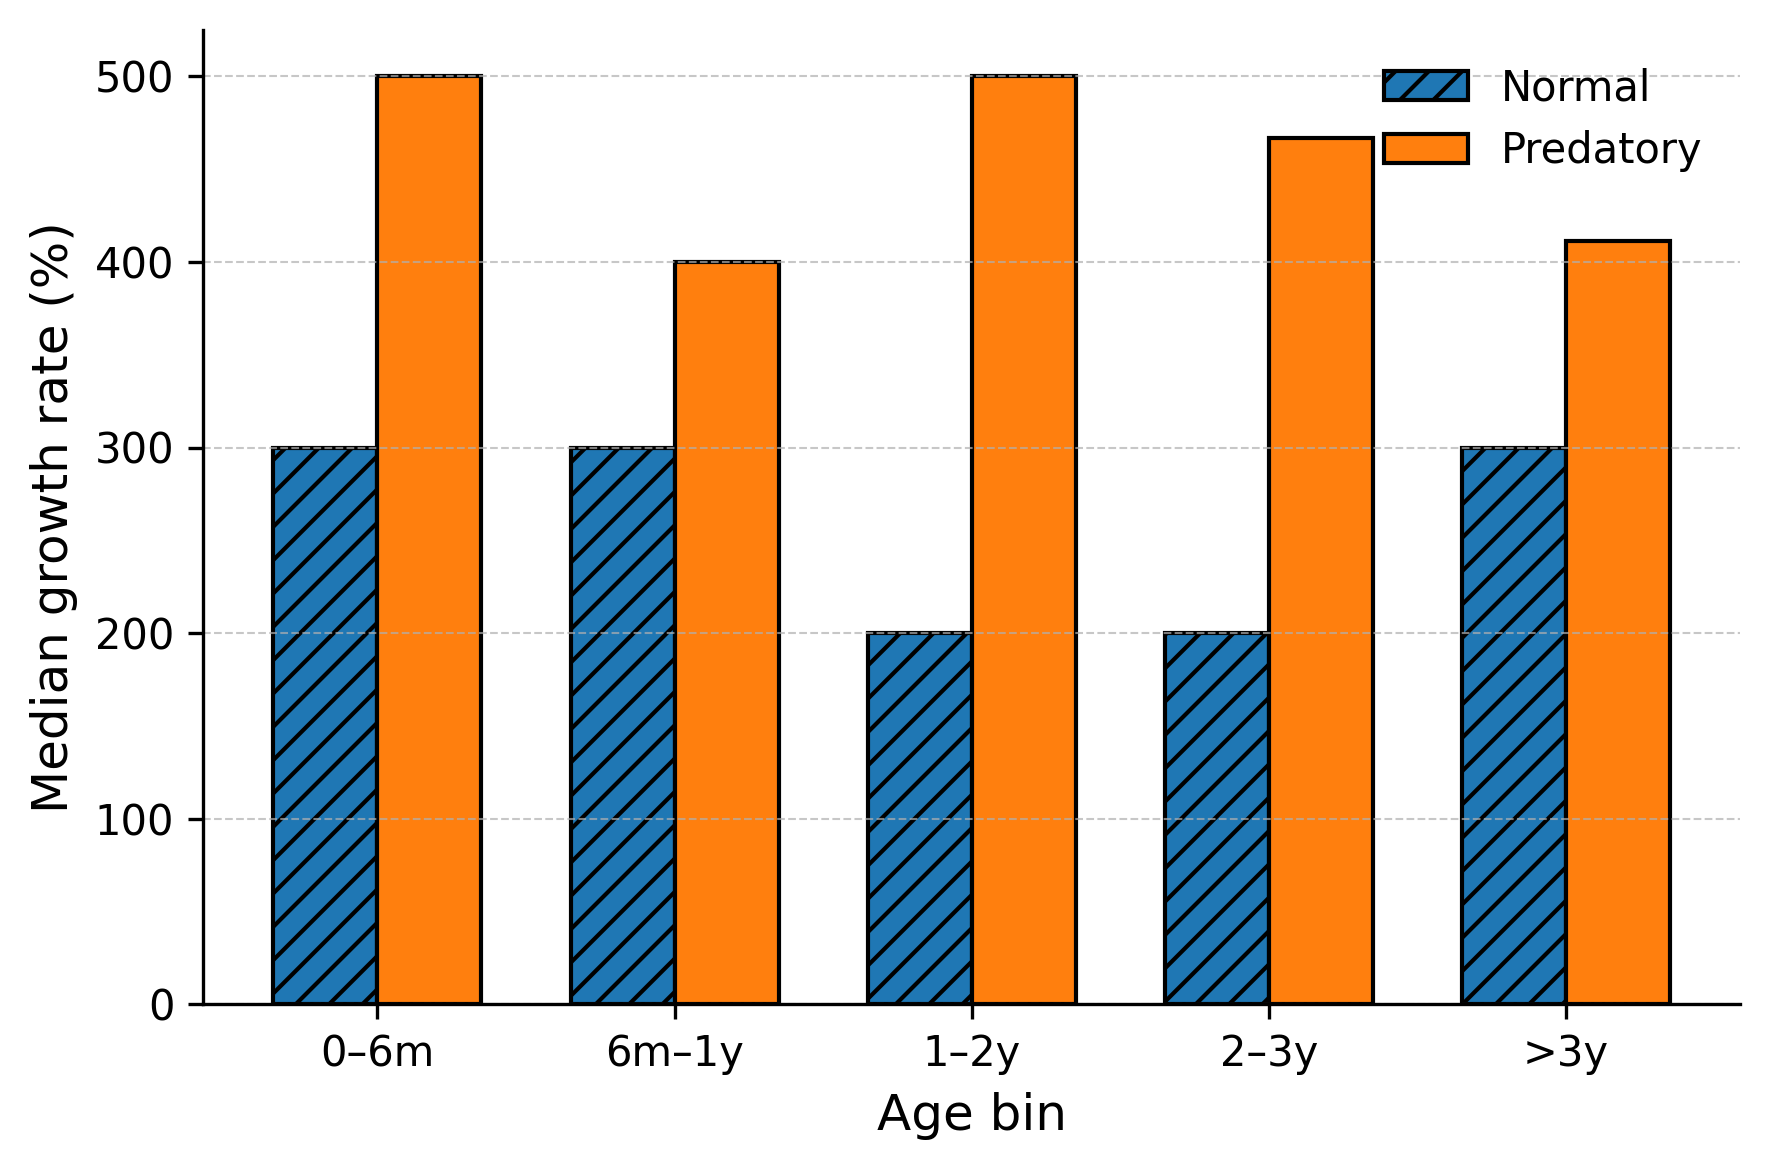

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

age_bins = ["0–6m", "6m–1y", "1–2y", "2–3y", ">3y"]
med_normal = [300.0, 300.0, 200.0, 200.0, 300.0]
med_pred =   [500.0, 400.0, 500.0, 466.7, 411.5]

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
x = np.arange(len(age_bins))
width = 0.35

bars_normal = ax.bar(
    x - width/2, med_normal, width,
    color='tab:blue', edgecolor='black', hatch='///', label='Normal'
)
bars_pred = ax.bar(
    x + width/2, med_pred, width,
    color='tab:orange', edgecolor='black', label='Predatory'
)

ax.set_xticks(x)
ax.set_xticklabels(age_bins, fontsize=10)
ax.set_xlabel('Age bin', fontsize=12)
ax.set_ylabel('Median growth rate (%)', fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()
